# Demonstration of split-step Fourier propagation

This notebook demonstrates basic use of the split-step Fourier routines on a 2D example. A single particle with wavefuntion $\psi(x,y,t)$ moves in a deep potential well $V(x,y)$ shaped like an ellipse. The total Hamiltonian is thus
$$ H = -\frac{1}{2} \frac{\partial^2}{\partial x^2} -\frac{1}{2} \frac{\partial^2}{\partial y^2} + V(x,y) $$
and we are solving the time-dependent Schrödinger equation
$$ i \frac{\partial}{\partial t}\psi(x,y,t) = H \psi(x,y,t), \quad \psi(x,y,0) = \psi_0(x,y), $$
for $t \in [0,t_\text{final}]$ using the split-step Fourier method.

In [1]:
import numpy as np
from fft_tdse import *
from psiviz import *
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
%matplotlib inline

## Setup
First, we set up the grid parameters and the external potential.

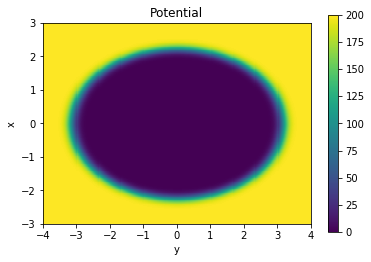

In [2]:
# Number of grid points in the x and y direction
ng = [256,256]
# a[0] <= x <= b[0], a[1] <= y <= b[1]
a = [-3,-4]
b = [3,4]
grid = FourierGrid(a,b,ng)

# Make an ellipse-shaped potential
x = grid.xx[0]
y = grid.xx[1]
r1 = 5.0**.5
r2 = 10.0**.5

I = np.array(x**2/r1**2 + y**2/r2**2 > 1, dtype=float)

from scipy.ndimage import gaussian_filter
V = 200 * gaussian_filter(I,sigma=5)

# Visualize the potential
plt.figure()
plt.imshow(V,aspect='equal',extent=[a[1],b[1],a[0],b[0]])
plt.title('Potential')
plt.xlabel('y')
plt.ylabel('x')
plt.colorbar()
plt.show()

ham = FourierHamiltonian(grid, Vfun = V)


In [3]:
def visualize(psi,heading):
    """ Visualize the wavefunction. """
    plt.figure()
    I = psiviz(psi)
    plt.imshow(I,aspect='equal',extent=[a[1],b[1],a[0],b[0]],origin='lower')
    plt.title(heading)
    plt.xlabel('y')
    plt.ylabel('x')
    
    # draw an ellipse
    ax = plt.gca()
    ax.add_patch(Ellipse((0, 0), width=r2*2, height=r1*2,edgecolor='white',
                 facecolor='none',
                 linewidth=5))    
    plt.show()
    

# Set up initial condition and propagator

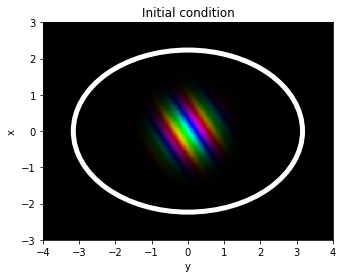

In [4]:
# Set up initial condition.
psi0 = np.exp(-2*(x**2+y**2) + 6j*y + 4j*x)
visualize(psi0,'Initial condition')

# Create a wavefunction object
wf = FourierWavefunction(grid)
wf.setPsi(psi0,normalize=True)

# Create a Strang splitting propagator
dt = 0.01 
prop = Propagator(ham, dt)

# Main simulation loop

The propagation is here. We do a nested loop, visualizing each time the outer loop advances.

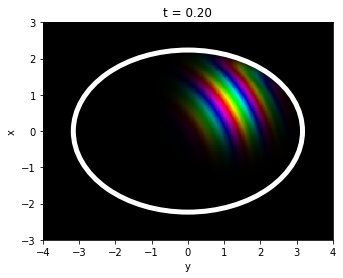

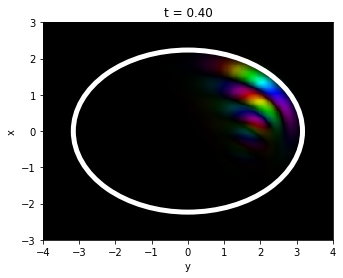

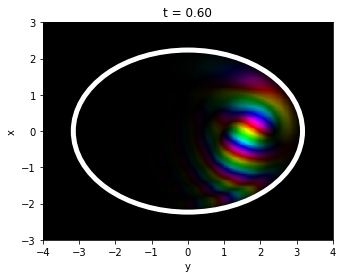

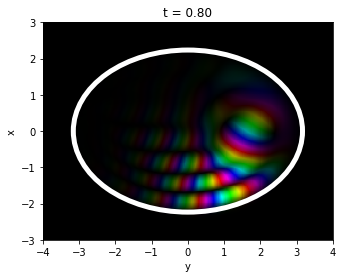

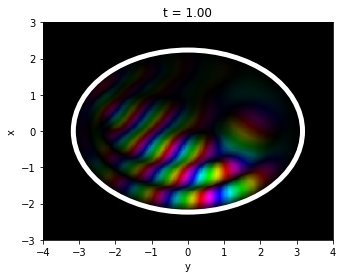

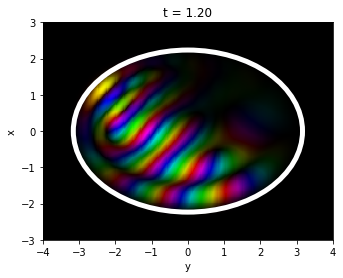

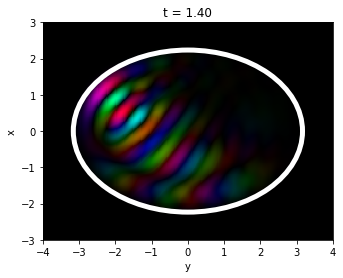

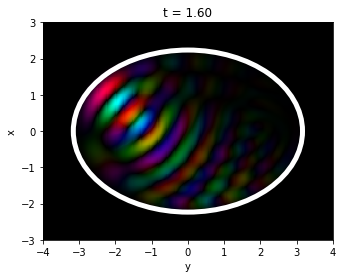

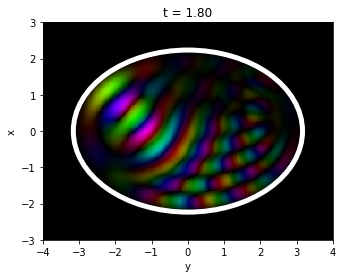

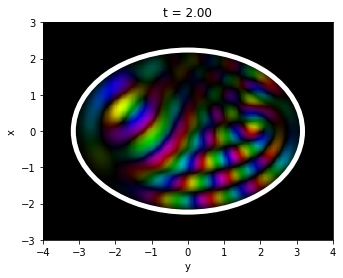

In [5]:
t = 0.0
for i in range(10):
    for k in range(20):
        prop.strang(wf,t)
        t += dt
    visualize(wf.psi,f't = {t:.2f}')
